In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time
import sys
sys.path.insert(0,'../../..')
import gp2
from gp2 import Runner
from keras import losses, metrics
from tensorflow.keras import optimizers

-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


In [3]:
R = Runner(classifier='kattunet2d',
           filter_num=[16, 32, 64, 128, 256],
           stack_num_down=2,
           stack_num_up=2,
           activation='ReLU',
           atten_activation='ReLU',
           attention='add',
           output_activation='Sigmoid',
           batch_norm=False,
           pool=False,
           unpool=False,
           weights='imagenet',
           optimizer= None, #None = default is optimizers.Adam(learning_rate=1e-3)
           loss=None, #None = default is losses.binary_crossentropy
           metric=None # None = default is Util.dice_coef
          )

*** GP2 KATTUnet2D ***
Working directory: /tmp/tmpzsx2dalgGP2
Using default discriminator (CNN)


In [5]:
# load our larger toy dataset (10k images and masks)
images = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/crack_segmentation_dataset/Crack_images_final.npy')
masks = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/crack_segmentation_dataset/Crack_masks_final.npy')

In [6]:
images.shape

(11298, 512, 512, 1)

In [7]:
masks.shape

(11298, 512, 512, 1)

In [8]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}

In [9]:
R.run(images=images, masks=masks, weights=weights, runs=8)

Weights OK!
******
Loop 1
Epoch 1/100
9/9 [==============================] - 29s 2s/step - loss: 0.6786 - dice_coeff: 0.1014 - val_loss: 0.6734 - val_dice_coeff: 0.1371
Epoch 2/100
9/9 [==============================] - 8s 954ms/step - loss: 0.6662 - dice_coeff: 0.1018 - val_loss: 0.6572 - val_dice_coeff: 0.1373
Epoch 3/100
9/9 [==============================] - 8s 963ms/step - loss: 0.6425 - dice_coeff: 0.1021 - val_loss: 0.6238 - val_dice_coeff: 0.1377
Epoch 4/100
9/9 [==============================] - 8s 955ms/step - loss: 0.5893 - dice_coeff: 0.1022 - val_loss: 0.5310 - val_dice_coeff: 0.1391
Epoch 5/100
9/9 [==============================] - 8s 964ms/step - loss: 0.3742 - dice_coeff: 0.0992 - val_loss: 0.3598 - val_dice_coeff: 0.0563
Epoch 6/100
9/9 [==============================] - 8s 956ms/step - loss: 0.2421 - dice_coeff: 0.0690 - val_loss: 0.2590 - val_dice_coeff: 0.1362
Epoch 7/100
9/9 [==============================] - 8s 961ms/step - loss: 0.2144 - dice_coeff: 0.0989 - val

In [10]:
R.classifier_scores

[[0.19479462504386902, 0.2702828049659729],
 [0.1686946302652359, 0.28551185131073],
 [0.1466982066631317, 0.33107393980026245],
 [0.13403105735778809, 0.3823919892311096],
 [0.12340082228183746, 0.4712500274181366],
 [0.12337837368249893, 0.47757649421691895],
 [0.11946157366037369, 0.4944193363189697],
 [0.11608622223138809, 0.4748430848121643]]

In [11]:
R.discriminator_scores

[[0.006838761270046234, 0.9985228776931763],
 [0.1886299103498459, 0.9940915703773499],
 [32.92172622680664, 0.6543574333190918],
 [29.90346908569336, 0.6484490633010864],
 [33.969058990478516, 0.6410635113716125],
 [21.045488357543945, 0.710487425327301],
 [36.05271911621094, 0.6115214228630066],
 [28.6176700592041, 0.6691285371780396]]

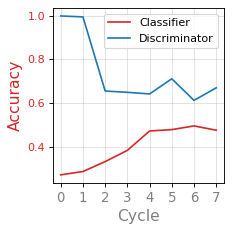

In [12]:
R.plot()